In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

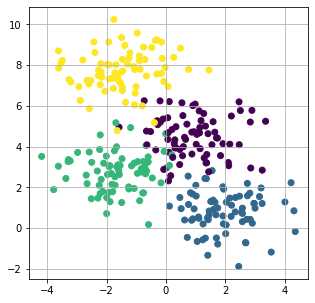

In [5]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

xfit = np.linspace(-1, 3.5)
figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt
ax.grid()
ax.scatter(X[:, 0], X[:, 1], c=y)

In [57]:
class KNN:
  def __init__(self, X, y) :
    self.X = X
    self.y = y

  def fit_data(self, test_size) :
    method = StandardScaler()
    self.X = method.fit_transform(self.X)
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = test_size)
    return X_train, X_test, y_train, y_test


  def find_distance(self, X_train, X_test):
    #create newaxis simply so that broadcast to all values
    dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
    sq_dist = dist ** 2
    
    #sum across feature dimension, thus axis = 2
    summed_dist = sq_dist.sum(axis=2)
    sq_dist = np.sqrt(summed_dist)
    return sq_dist


  def find_neighbors(self, X_train, X_test, k=3):
    dist = self.find_distance(X_train, X_test)
    #return the first k neighbors
    neighbors_ix = np.argsort(dist)[:, 0:k]
    return neighbors_ix

  def find_best_k(self, X_train, X_test, y_train, y_test, K, fold_proportion) :
    foldsize = int(X_train.shape[0] * fold_proportion)
    accuracy_K = np.zeros(K)
    for k in range(1, K):
      number_fold = int(X_train.shape[0] / foldsize)
      accuracy_list = np.zeros(number_fold)
      for fold_idx, i in enumerate(range(0, X_train.shape[0], foldsize)):
        X_test_fold = X_train[i: i+foldsize]
        X_train_fold = np.concatenate((X_train[:i], X_train[i+foldsize:]))
        y_test_fold = y_train[i: i+ foldsize]
        y_train_fold = np.concatenate((y_train[:i], y_train[i+foldsize:]))
        pred, prob = self.predict(X_train_fold, X_test_fold, y_train_fold, y_test_fold, k)
        accuracy_list[fold_idx] = np.sum(pred == y_test_fold)/ y_test_fold.shape[0]
      accuracy_K[k] = np.average(accuracy_list)
    return accuracy_K

  def predict(self, X_train, X_test, y_train, y_test, K):
    neighbors_ix = self.find_neighbors(X_train, X_test, K)
    pred = np.zeros(y_test.shape[0])
    prob = np.zeros(y_test.shape[0])
    for ix, y in enumerate(y_train[neighbors_ix]):
        pred[ix], prob[ix] = self.get_most_common2(y)
    return pred, prob

  def get_most_common2(self, y):
    count = np.bincount(y)
    sort_idx = np.argsort(count)
    if count.shape[0] > 2 :
      if count[sort_idx[-1]] == count[sort_idx[-2]] :
        return sort_idx[-3], count[sort_idx[-3]] / np.sum(count) 
      else :
        return sort_idx[-1], count[sort_idx[-1]] / np.sum(count)  
    else : 
      return  sort_idx[-1], count[sort_idx[-1]] / np.sum(count)


In [58]:
exp = KNN(X, y)
X_train, X_test, y_train, y_test = exp.fit_data(test_size = 0.3)
y_pred, prob = exp.predict(X_train, X_test, y_train, y_test, 3)
accuracy = exp.find_best_k(X_train, X_test, y_train, y_test, 10, 0.1)

In [59]:
print('Accuracy    : ', np.sum(y_pred == y_test)/ y_test.shape[0])

Accuracy    :  0.9111111111111111


[0.         0.92380952 0.87619048 0.92857143 0.9047619  0.91428571
 0.91428571 0.92857143 0.91904762 0.92857143]


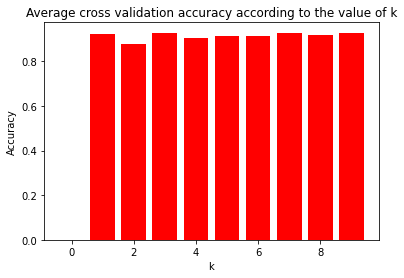

In [68]:
print(accuracy)
x = np.arange(10)
plt.bar(np.arange(10), accuracy, color='red')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Average cross validation accuracy according to the value of k')
plt.show()